In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import table
import seaborn as sns
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import numpy as np
from IPython.display import display

# Load the data from the uploaded Excel file
file_path = 'Data.xlsx'
data = pd.read_excel(file_path)


In [ ]:
# Function to organize the data
def organize_data(dataframe):
    organized_data = []
    for index, row in dataframe.iterrows():
        participant_data = [
            row['Participants'], row['Age'], row['Gender'],
            row['Education Level'], row['Technological Capability'],
            row['Nested Dropdown Menu - Task Time'],
            row['Nested Dropdown Menu - Providing Frustrating/ Satisfying Experience'],
            row['Nested Dropdown Menu - Easy/ Difficult to Use'],
            row['Nested Dropdown Menu - Easy/ Difficult to Learn'],
            row['Nested Fisheye Menu - Task Time'],
            row['Nested Fisheye Menu - Providing Frustrating/ Satisfying Experience'],
            row['Nested Fisheye Menu - Easy/ Difficult to Use'],
            row['Nested Fisheye Menu - Easy/ Difficult to Learn'],
            row['Accordion Menu - Task Time'],
            row['Accordion Menu - Providing Frustrating/ Satisfying Experience'],
            row['Accordion Menu - Easy/ Difficult to Use'],
            row['Accordion Menu - Easy/ Difficult to Learn']
        ]
        organized_data.append(participant_data)
    return organized_data

organized_data_list = organize_data(data)
print(organized_data_list[:5])  # Display the first 5 entries to verify
for participant in organized_data_list:
    print(participant, end='\n\n')


[['Hakkı Zambak ', 23, 'Male', 'Senior Student in Computer Science\xa0 at Sabancı University', 4, 29.26, 4, 5, 5, 46.13, 4, 3, 3, 42.42, 4, 4, 4], ['Meltem Oras', 23, 'Female', 'Senior Student in Industrial Engineering at Sabancı University', 3, 30.03, 4, 5, 4, 41.14, 3, 3, 3, 37.39, 3, 3, 3], ['Selin Özkan ', 22, 'Female', 'Senior Student in Economy at Sabancı University', 3, 26.46, 5, 5, 5, 37.17, 3, 3, 4, 31.15, 4, 3, 4], ['Ege Altınsoy', 23, 'Male', 'Senior Student in Computer Science\xa0 at Sabancı University', 4, 22.13, 5, 5, 5, 29.49, 4, 3, 4, 24.44, 4, 5, 4], ['Serra Bayraktar', 22, 'Female', 'Junior Student in Computer Science at Sabancı University', 4, 33.01, 5, 4, 5, 45.03, 3, 3, 4, 41.06, 3, 3, 4]]
['Hakkı Zambak ', 23, 'Male', 'Senior Student in Computer Science\xa0 at Sabancı University', 4, 29.26, 4, 5, 5, 46.13, 4, 3, 3, 42.42, 4, 4, 4]

['Meltem Oras', 23, 'Female', 'Senior Student in Industrial Engineering at Sabancı University', 3, 30.03, 4, 5, 4, 41.14, 3, 3, 3, 37.

In [ ]:
def create_summary_table(dataframe):
    summary_table = dataframe[['Participants', 'Age', 'Gender', 'Education Level', 'Technological Capability']]
    return summary_table


In [ ]:
def create_summary_table_from_list(data_list):
    summary_data = []
    for entry in data_list:
        summary_data.append({
            'Participants': entry[0],
            'Age': entry[1],
            'Gender': entry[2],
            'Education Level': entry[3],
            'Technological Capability': entry[4]
        })
    summary_table = pd.DataFrame(summary_data)
    return summary_table

summary_table_from_list = create_summary_table_from_list(organized_data_list)

display(summary_table_from_list)


,Participants,Age,Gender,Education Level,Technological Capability
0,Hakkı Zambak,23,Male,Senior Student in Computer Science at Sabancı...,4
1,Meltem Oras,23,Female,Senior Student in Industrial Engineering at Sa...,3
2,Selin Özkan,22,Female,Senior Student in Economy at Sabancı University,3
3,Ege Altınsoy,23,Male,Senior Student in Computer Science at Sabancı...,4
4,Serra Bayraktar,22,Female,Junior Student in Computer Science at Sabancı ...,4
5,Mustafa Güneş,43,Male,High school graduate,2
6,Eren Özçatalbaş,21,Male,Junior Industrial Engineering Student at Saban...,4
7,Burak İnkaya,22,Male,Senior Computer Science Student at Sabancı Uni...,5
8,Alanur Bilgili,24,Female,Graduated from Özyeğin University,5
9,Fulya Aras,39,Female,Graduated from Marmara University,2


In [ ]:
# Function to create a summary table from the organized data
def create_summary_table_from_list(data_list):
    summary_data = []
    for entry in data_list:
        summary_data.append({
            'Participants': entry[0],
            'Age': entry[1],
            'Gender': entry[2],
            'Technological Capability': entry[4]
        })
    summary_table = pd.DataFrame(summary_data)
    return summary_table

# Create a plot and save it as a .png file
def save_table_as_png(dataframe, file_path):
    fig, ax = plt.subplots(figsize=(12, 6))  # Set the size of the plot
    ax.axis('tight')
    ax.axis('off')

    tbl = table(ax, dataframe, loc='center', cellLoc='center', colWidths=[0.15]*len(dataframe.columns))
    tbl.auto_set_font_size(False)
    tbl.set_fontsize(10)
    tbl.scale(1.2, 1.2)

    # Adjust cell height
    for key, cell in tbl.get_celld().items():
        cell.set_height(0.1)

    plt.savefig(file_path, bbox_inches='tight', dpi=300)
    plt.close(fig)  # Close the figure after saving to free up memory


In [ ]:
# Call the function with the organized_data_list
summary_table_from_list = create_summary_table_from_list(organized_data_list)

# Save the table as a .png file
file_path = "summary_table_no_education.png"
save_table_as_png(summary_table_from_list, file_path)

print(f"Table saved as {file_path}")


Table saved as summary_table_no_education.png


In [ ]:
# Function to create a task completion time table from the organized data
def create_task_time_table(data_list):
    task_time_data = []
    for entry in data_list:
        task_time_data.append({
            'Participants': entry[0],
            'Nested Dropdown': entry[5],
            'Nested Fisheye': entry[9],
            'Accordion': entry[13]
        })
    task_time_table = pd.DataFrame(task_time_data)
    return task_time_table

# Create a plot and save it as a .png file with a title
def save_task_time_table_as_png(dataframe, file_path):
    fig, ax = plt.subplots(figsize=(15, 8))  # Set the size of the plot
    ax.axis('tight')
    ax.axis('off')

    tbl = table(ax, dataframe, loc='center', cellLoc='center', colWidths=[0.2]*len(dataframe.columns))
    tbl.auto_set_font_size(False)
    tbl.set_fontsize(10)
    tbl.scale(1.2, 1.2)

    # Adjust cell height
    for key, cell in tbl.get_celld().items():
        cell.set_height(0.1)

    plt.savefig(file_path, bbox_inches='tight', dpi=300)
    plt.close(fig)  # Close the figure after saving to free up memory


In [ ]:
# Call the function with the organized_data_list
task_time_table = create_task_time_table(organized_data_list)

# Display the table
display(task_time_table)

# Save the table as a .png file
file_path = "task_completion_times.png"
save_task_time_table_as_png(task_time_table, file_path)

print(f"Table saved as {file_path}")


,Participants,Nested Dropdown,Nested Fisheye,Accordion
0,Hakkı Zambak,29.26,46.13,42.42
1,Meltem Oras,30.03,41.14,37.39
2,Selin Özkan,26.46,37.17,31.15
3,Ege Altınsoy,22.13,29.49,24.44
4,Serra Bayraktar,33.01,45.03,41.06
5,Mustafa Güneş,49.19,54.29,59.18
6,Eren Özçatalbaş,25.13,34.12,28.51
7,Burak İnkaya,21.01,29.02,24.29
8,Alanur Bilgili,20.19,27.38,22.22
9,Fulya Aras,43.23,54.09,49.13


Table saved as task_completion_times.png


In [ ]:
# Function to create a satisfaction and ease table from the organized data
def create_satisfaction_ease_table(data_list):
    satisfaction_ease_data = []
    for entry in data_list:
        satisfaction_ease_data.append({
            'Participants': entry[0],
            'Dropdown - Frustrating/ Satisfying': entry[6],
            'Dropdown - Easy/ Difficult': entry[7],
            'Dropdown - Easy/ Difficult to Learn': entry[8],
            'Fisheye - Frustrating/ Satisfying': entry[10],
            'Fisheye - Easy/ Difficult': entry[11],
            'Fisheye - Easy/ Difficult to Learn': entry[12],
            'Accordion - Frustrating/ Satisfying': entry[14],
            'Accordion - Easy/ Difficult': entry[15],
            'Accordion - Easy/ Difficult to Learn': entry[16]
        })
    satisfaction_ease_table = pd.DataFrame(satisfaction_ease_data)
    return satisfaction_ease_table

# Create a plot and save it as a .png file with a title
def save_satisfaction_ease_table_as_png(dataframe, file_path):
    fig, ax = plt.subplots(figsize=(20, 10))  # Set the size of the plot
    ax.set_title('Satisfaction and Ease Ratings', fontsize=16, pad=20)
    ax.axis('tight')
    ax.axis('off')

    tbl = table(ax, dataframe, loc='center', cellLoc='center', colWidths=[0.15]*len(dataframe.columns))
    tbl.auto_set_font_size(False)
    tbl.set_fontsize(40)  # Make the font size 4 times larger
    tbl.scale(1.2, 1.2)

    # Adjust cell height
    for key, cell in tbl.get_celld().items():
        cell.set_height(0.15)

    # Change header colors
    for key, cell in tbl.get_celld().items():
        if key[0] == 0:  # Header row
            if 'Dropdown' in cell.get_text().get_text():
                cell.set_facecolor('#FFDDC1')  # Light Orange for Dropdown
            elif 'Fisheye' in cell.get_text().get_text():
                cell.set_facecolor('#C1FFD7')  # Light Green for Fisheye
            elif 'Accordion' in cell.get_text().get_text():
                cell.set_facecolor('#C1D7FF')  # Light Blue for Accordion

    plt.savefig(file_path, bbox_inches='tight', dpi=300)
    plt.close(fig)  # Close the figure after saving to free up memory


In [ ]:
# Call the function with the organized_data_list
satisfaction_ease_table = create_satisfaction_ease_table(organized_data_list)

display(satisfaction_ease_table)

# Save the table as a .png file
file_path = "satisfaction_ease_table_large_numbers.png"
save_satisfaction_ease_table_as_png(satisfaction_ease_table, file_path)

print(f"Table saved as {file_path}")


,Participants,Dropdown - Frustrating/ Satisfying,Dropdown - Easy/ Difficult,Dropdown - Easy/ Difficult to Learn,Fisheye - Frustrating/ Satisfying,Fisheye - Easy/ Difficult,Fisheye - Easy/ Difficult to Learn,Accordion - Frustrating/ Satisfying,Accordion - Easy/ Difficult,Accordion - Easy/ Difficult to Learn
0,Hakkı Zambak,4,5,5,4,3,3,4,4,4
1,Meltem Oras,4,5,4,3,3,3,3,3,3
2,Selin Özkan,5,5,5,3,3,4,4,3,4
3,Ege Altınsoy,5,5,5,4,3,4,4,5,4
4,Serra Bayraktar,5,4,5,3,3,4,3,3,4
5,Mustafa Güneş,3,3,4,2,2,2,2,3,3
6,Eren Özçatalbaş,4,4,5,3,3,4,4,4,5
7,Burak İnkaya,5,5,5,4,3,4,4,4,4
8,Alanur Bilgili,5,5,5,4,4,5,4,5,4
9,Fulya Aras,4,4,4,2,2,2,3,3,3


Table saved as satisfaction_ease_table_large_numbers.png


In [ ]:
# Function to calculate average task completion time for each menu type
def calculate_average_times(data_list):
    dropdown_times = [entry[5] for entry in data_list]
    fisheye_times = [entry[9] for entry in data_list]
    accordion_times = [entry[13] for entry in data_list]

    avg_dropdown = sum(dropdown_times) / len(dropdown_times)
    avg_fisheye = sum(fisheye_times) / len(fisheye_times)
    avg_accordion = sum(accordion_times) / len(accordion_times)

    return avg_dropdown, avg_fisheye, avg_accordion


In [ ]:
# Function to plot the average task completion times
def plot_average_times(avg_dropdown, avg_fisheye, avg_accordion):
    menu_types = ['Nested Dropdown', 'Nested Fisheye', 'Accordion']
    avg_times = [avg_dropdown, avg_fisheye, avg_accordion]

    plt.figure(figsize=(10, 6))
    plt.bar(menu_types, avg_times, color=['blue', 'green', 'orange'])
    plt.xlabel('Menu Types')
    plt.ylabel('Average Task Completion Time (seconds)')
    plt.title('Average Task Completion Time by Menu Type')
    plt.show()


Average Task Completion Time for Nested Dropdown: 32.34 seconds
Average Task Completion Time for Nested Fisheye: 41.13 seconds
Average Task Completion Time for Accordion: 37.73 seconds


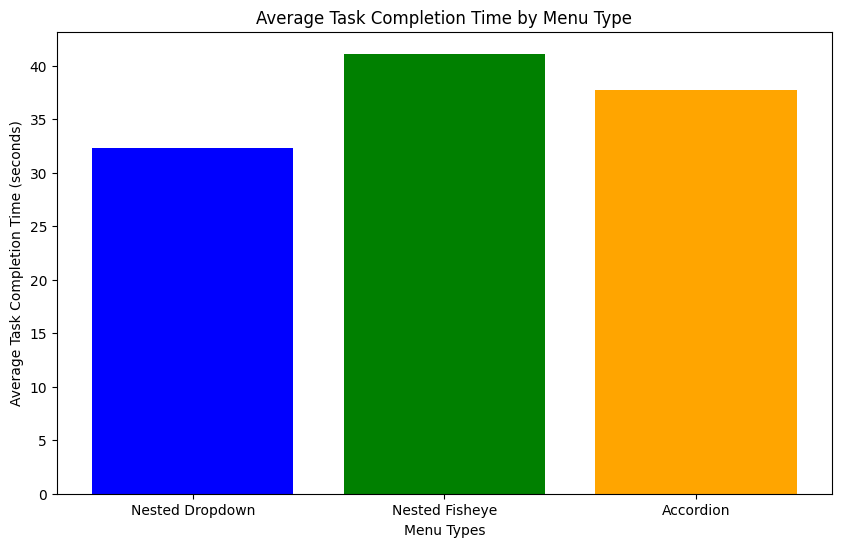

In [ ]:
# Call the functions with the organized_data_list
avg_dropdown, avg_fisheye, avg_accordion = calculate_average_times(organized_data_list)

# Print the average times
print(f"Average Task Completion Time for Nested Dropdown: {avg_dropdown:.2f} seconds")
print(f"Average Task Completion Time for Nested Fisheye: {avg_fisheye:.2f} seconds")
print(f"Average Task Completion Time for Accordion: {avg_accordion:.2f} seconds")

# Plot the average times
plot_average_times(avg_dropdown, avg_fisheye, avg_accordion)


In [ ]:
# Function to calculate average ratings for each menu type
def calculate_average_ratings(data_list):
    dropdown_frustrating = [entry[6] for entry in data_list]
    fisheye_frustrating = [entry[10] for entry in data_list]
    accordion_frustrating = [entry[14] for entry in data_list]

    dropdown_easy_use = [entry[7] for entry in data_list]
    fisheye_easy_use = [entry[11] for entry in data_list]
    accordion_easy_use = [entry[15] for entry in data_list]

    dropdown_easy_learn = [entry[8] for entry in data_list]
    fisheye_easy_learn = [entry[12] for entry in data_list]
    accordion_easy_learn = [entry[16] for entry in data_list]

    avg_frustrating = {
        'Nested Dropdown': sum(dropdown_frustrating) / len(dropdown_frustrating),
        'Nested Fisheye': sum(fisheye_frustrating) / len(fisheye_frustrating),
        'Accordion': sum(accordion_frustrating) / len(accordion_frustrating)
    }

    avg_easy_use = {
        'Nested Dropdown': sum(dropdown_easy_use) / len(dropdown_easy_use),
        'Nested Fisheye': sum(fisheye_easy_use) / len(fisheye_easy_use),
        'Accordion': sum(accordion_easy_use) / len(accordion_easy_use)
    }

    avg_easy_learn = {
        'Nested Dropdown': sum(dropdown_easy_learn) / len(dropdown_easy_learn),
        'Nested Fisheye': sum(fisheye_easy_learn) / len(fisheye_easy_learn),
        'Accordion': sum(accordion_easy_learn) / len(accordion_easy_learn)
    }

    return avg_frustrating, avg_easy_use, avg_easy_learn


In [ ]:
# Function to plot the average ratings
def plot_average_ratings(avg_frustrating, avg_easy_use, avg_easy_learn):
    menu_types = list(avg_frustrating.keys())

    avg_frustrating_values = list(avg_frustrating.values())
    avg_easy_use_values = list(avg_easy_use.values())
    avg_easy_learn_values = list(avg_easy_learn.values())

    x = range(len(menu_types))

    plt.figure(figsize=(15, 5))

    # Plot for Frustrating/Satisfying Experience
    plt.subplot(1, 3, 1)
    plt.bar(x, avg_frustrating_values, color=['blue', 'green', 'orange'])
    plt.xlabel('Menu Types')
    plt.ylabel('Average Rating')
    plt.title('Providing Frustrating/Satisfying Experience')
    plt.xticks(x, menu_types)

    # Plot for Easy/Difficult to Use
    plt.subplot(1, 3, 2)
    plt.bar(x, avg_easy_use_values, color=['blue', 'green', 'orange'])
    plt.xlabel('Menu Types')
    plt.ylabel('Average Rating')
    plt.title('Easy/Difficult to Use')
    plt.xticks(x, menu_types)

    # Plot for Easy/Difficult to Learn
    plt.subplot(1, 3, 3)
    plt.bar(x, avg_easy_learn_values, color=['blue', 'green', 'orange'])
    plt.xlabel('Menu Types')
    plt.ylabel('Average Rating')
    plt.title('Easy/Difficult to Learn')
    plt.xticks(x, menu_types)

    plt.tight_layout()
    plt.show()


Average Ratings for Providing Frustrating/Satisfying Experience:
{'Nested Dropdown': 4.208333333333333, 'Nested Fisheye': 3.375, 'Accordion': 3.75}

Average Ratings for Easy/Difficult to Use:
{'Nested Dropdown': 4.166666666666667, 'Nested Fisheye': 2.9166666666666665, 'Accordion': 3.7083333333333335}

Average Ratings for Easy/Difficult to Learn:
{'Nested Dropdown': 4.25, 'Nested Fisheye': 3.375, 'Accordion': 3.75}


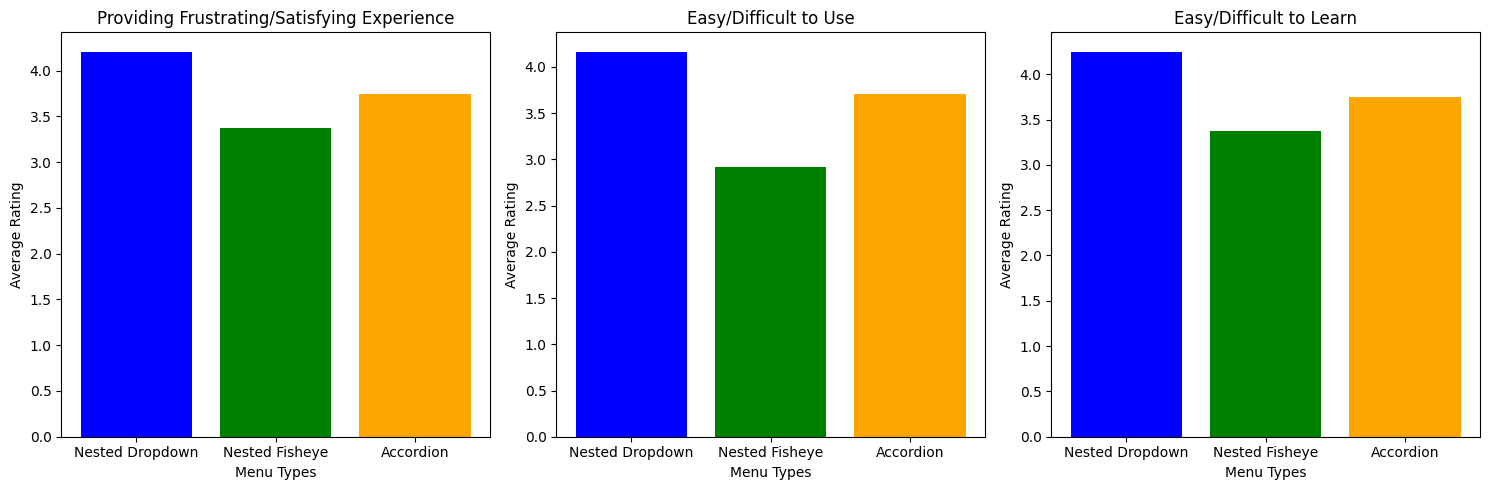

In [ ]:
# Call the functions with the organized_data_list
avg_frustrating, avg_easy_use, avg_easy_learn = calculate_average_ratings(organized_data_list)

# Print the average ratings
print("Average Ratings for Providing Frustrating/Satisfying Experience:")
print(avg_frustrating)
print("\nAverage Ratings for Easy/Difficult to Use:")
print(avg_easy_use)
print("\nAverage Ratings for Easy/Difficult to Learn:")
print(avg_easy_learn)

# Plot the average ratings
plot_average_ratings(avg_frustrating, avg_easy_use, avg_easy_learn)


In [ ]:
# Extract data from organized_data_list
dropdown_frustrating = [entry[6] for entry in organized_data_list]
fisheye_frustrating = [entry[10] for entry in organized_data_list]
accordion_frustrating = [entry[14] for entry in organized_data_list]

# Calculate standard deviation and variance
def calculate_variance_sd(data):
    variance = np.var(data, ddof=1)  # Using ddof=1 for sample variance
    std_dev = np.std(data, ddof=1)   # Using ddof=1 for sample standard deviation
    return variance, std_dev

dropdown_variance_sd = calculate_variance_sd(dropdown_frustrating)
fisheye_variance_sd = calculate_variance_sd(fisheye_frustrating)
accordion_variance_sd = calculate_variance_sd(accordion_frustrating)

print("Dropdown Variance and Std Dev:", dropdown_variance_sd)
print("Fisheye Variance and Std Dev:", fisheye_variance_sd)
print("Accordion Variance and Std Dev:", accordion_variance_sd)


Dropdown Variance and Std Dev: (0.7807971014492755, 0.883627241233132)
Fisheye Variance and Std Dev: (1.201086956521739, 1.0959411282189109)
Accordion Variance and Std Dev: (0.6304347826086957, 0.7939992333804207)


Dropdown Menu:

Varyans: 0.78
Standart Sapma: 0.88
Yorum: Dropdown menü için kullanıcı değerlendirmeleri nispeten tutarlıdır. Standart sapmanın düşük olması, kullanıcıların değerlendirmelerinde büyük bir değişkenlik olmadığını gösterir.
Fisheye Menu:

Varyans: 1.20
Standart Sapma: 1.10
Yorum: Fisheye menü için kullanıcı değerlendirmeleri daha fazla değişkenlik göstermektedir. Standart sapmanın daha yüksek olması, kullanıcıların değerlendirmelerinde daha geniş bir aralığa yayıldığını gösterir. Bu, kullanıcıların bu menü tipine karşı daha farklı görüşlere sahip olduğunu gösterebilir.
Accordion Menu:

Varyans: 0.63
Standart Sapma: 0.79
Yorum: Accordion menü için kullanıcı değerlendirmeleri de nispeten tutarlıdır. Standart sapmanın düşük olması, kullanıcıların değerlendirmelerinde büyük bir değişkenlik olmadığını gösterir.
Genel Yorum:
Dropdown ve Accordion Menüleri: Bu iki menü tipi için kullanıcı değerlendirmeleri daha tutarlı ve birbirine yakın. Bu, kullanıcıların bu menü tiplerine karşı benzer deneyimler yaşadığını gösterir.
Fisheye Menü: Kullanıcı değerlendirmeleri daha değişken. Bu, bazı kullanıcıların bu menü tipini çok beğenirken, bazı kullanıcıların beğenmediğini gösterebilir.

In [ ]:
# Function to calculate average ratings for each menu type
def calculate_average_ratings(data_list):
    dropdown_frustrating = [entry[6] for entry in data_list]
    fisheye_frustrating = [entry[10] for entry in data_list]
    accordion_frustrating = [entry[14] for entry in data_list]

    dropdown_easy_use = [entry[7] for entry in data_list]
    fisheye_easy_use = [entry[11] for entry in data_list]
    accordion_easy_use = [entry[15] for entry in data_list]

    dropdown_easy_learn = [entry[8] for entry in data_list]
    fisheye_easy_learn = [entry[12] for entry in data_list]
    accordion_easy_learn = [entry[16] for entry in data_list]

    avg_frustrating = {
        'Nested Dropdown': sum(dropdown_frustrating) / len(dropdown_frustrating),
        'Nested Fisheye': sum(fisheye_frustrating) / len(fisheye_frustrating),
        'Accordion': sum(accordion_frustrating) / len(accordion_frustrating)
    }

    avg_easy_use = {
        'Nested Dropdown': sum(dropdown_easy_use) / len(dropdown_easy_use),
        'Nested Fisheye': sum(fisheye_easy_use) / len(fisheye_easy_use),
        'Accordion': sum(accordion_easy_use) / len(accordion_easy_use)
    }

    avg_easy_learn = {
        'Nested Dropdown': sum(dropdown_easy_learn) / len(dropdown_easy_learn),
        'Nested Fisheye': sum(fisheye_easy_learn) / len(fisheye_easy_learn),
        'Accordion': sum(accordion_easy_learn) / len(accordion_easy_learn)
    }

    avg_ratings = {
        'Nested Dropdown': (avg_frustrating['Nested Dropdown'] + avg_easy_use['Nested Dropdown'] + avg_easy_learn['Nested Dropdown']) / 3,
        'Nested Fisheye': (avg_frustrating['Nested Fisheye'] + avg_easy_use['Nested Fisheye'] + avg_easy_learn['Nested Fisheye']) / 3,
        'Accordion': (avg_frustrating['Accordion'] + avg_easy_use['Accordion'] + avg_easy_learn['Accordion']) / 3
    }

    return avg_ratings


In [ ]:
# Function to plot the average ratings
def plot_average_ratings(avg_ratings):
    menu_types = list(avg_ratings.keys())
    avg_values = list(avg_ratings.values())

    plt.figure(figsize=(10, 6))
    plt.bar(menu_types, avg_values, color=['blue', 'green', 'orange'])
    plt.xlabel('Menu Types')
    plt.ylabel('Average Rating')
    plt.title('Average Ratings of Menu Types')
    plt.ylim(0, 5)
    plt.show()


Average Ratings for Each Menu Type:
{'Nested Dropdown': 4.208333333333333, 'Nested Fisheye': 3.222222222222222, 'Accordion': 3.736111111111111}


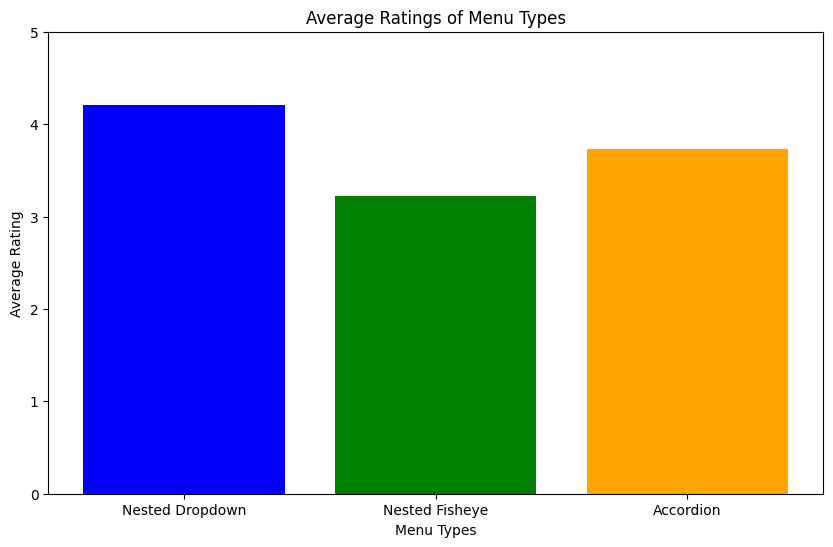

In [ ]:
# Call the functions with the organized_data_list
avg_ratings = calculate_average_ratings(organized_data_list)

# Print the average ratings
print("Average Ratings for Each Menu Type:")
print(avg_ratings)

# Plot the average ratings
plot_average_ratings(avg_ratings)


In [ ]:
# Extracting relevant data
dropdown_easy_use = [entry[7] for entry in organized_data_list]
fisheye_easy_use = [entry[11] for entry in organized_data_list]
accordion_easy_use = [entry[15] for entry in organized_data_list]

# Calculating average ratings for ease of use
avg_easy_use = {
    'Nested Dropdown': sum(dropdown_easy_use) / len(dropdown_easy_use),
    'Nested Fisheye': sum(fisheye_easy_use) / len(fisheye_easy_use),
    'Accordion': sum(accordion_easy_use) / len(accordion_easy_use)
}

# Finding easiest and most challenging menu types
easiest_menu = min(avg_easy_use, key=avg_easy_use.get)
most_challenging_menu = max(avg_easy_use, key=avg_easy_use.get)

print("Average Ratings for Easy/Difficult to Use:")
print(avg_easy_use)
print(f"Easiest Menu Type: {easiest_menu}")
print(f"Most Challenging Menu Type: {most_challenging_menu}")


Average Ratings for Easy/Difficult to Use:
{'Nested Dropdown': 4.166666666666667, 'Nested Fisheye': 2.9166666666666665, 'Accordion': 3.7083333333333335}
Easiest Menu Type: Nested Fisheye
Most Challenging Menu Type: Nested Dropdown


In [ ]:
# Extracting technological capability data
tech_capability = [entry[4] for entry in organized_data_list]

# Calculating correlations
correlation_dropdown = np.corrcoef(tech_capability, dropdown_easy_use)[0, 1]
correlation_fisheye = np.corrcoef(tech_capability, fisheye_easy_use)[0, 1]
correlation_accordion = np.corrcoef(tech_capability, accordion_easy_use)[0, 1]

print("Correlation between Technological Capability and Ease of Use Ratings:")
print(f"Nested Dropdown: {correlation_dropdown}")
print(f"Nested Fisheye: {correlation_fisheye}")
print(f"Accordion: {correlation_accordion}")


Correlation between Technological Capability and Ease of Use Ratings:
Nested Dropdown: 0.7491587023046329
Nested Fisheye: 0.7895792475371107
Accordion: 0.8000038659036159


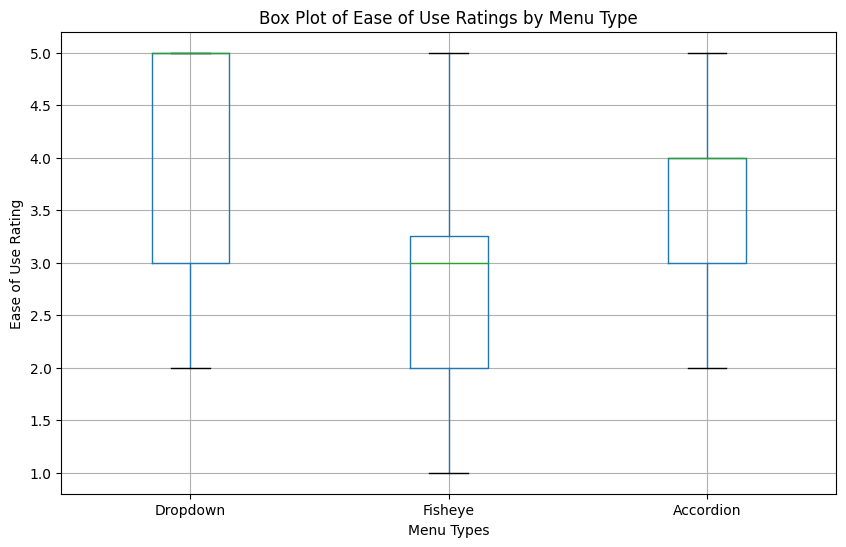

In [ ]:
# Extracting data
dropdown_easy_use = [entry[7] for entry in organized_data_list]
fisheye_easy_use = [entry[11] for entry in organized_data_list]
accordion_easy_use = [entry[15] for entry in organized_data_list]

# Creating a dataframe for ease of use ratings
data = {
    'Dropdown': dropdown_easy_use,
    'Fisheye': fisheye_easy_use,
    'Accordion': accordion_easy_use
}
df = pd.DataFrame(data)

# Plotting box plot
plt.figure(figsize=(10, 6))
df.boxplot()
plt.xlabel('Menu Types')
plt.ylabel('Ease of Use Rating')
plt.title('Box Plot of Ease of Use Ratings by Menu Type')
plt.show()


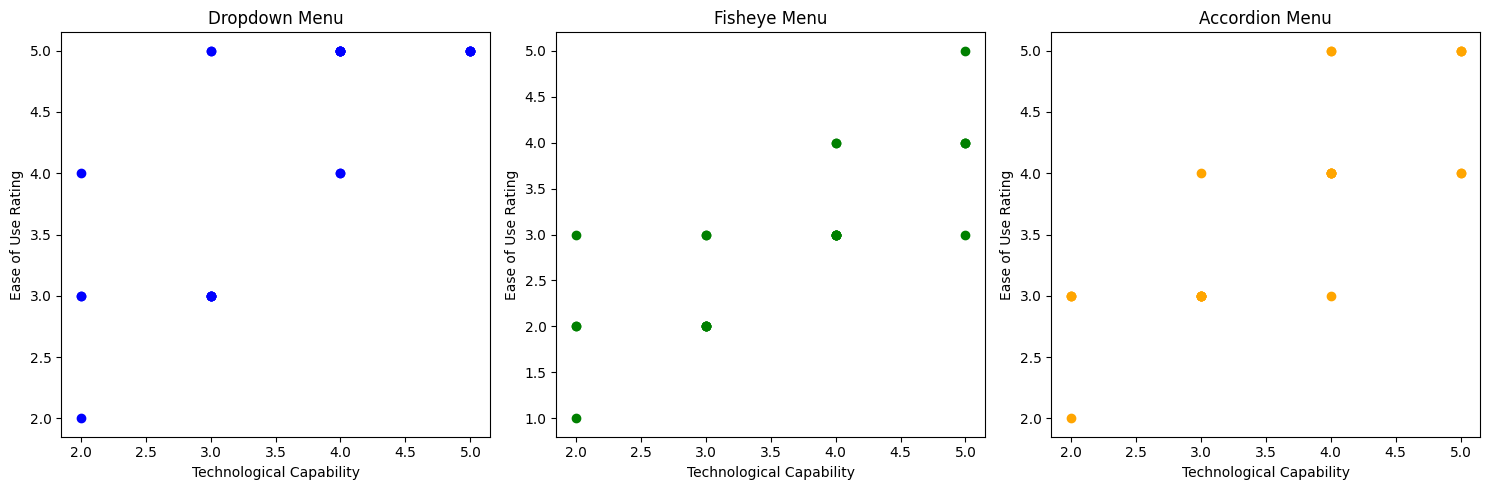

In [ ]:
# Extracting technological capability data
tech_capability = [entry[4] for entry in organized_data_list]

# Plotting scatter plot for each menu type
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(tech_capability, dropdown_easy_use, color='blue')
plt.xlabel('Technological Capability')
plt.ylabel('Ease of Use Rating')
plt.title('Dropdown Menu')

plt.subplot(1, 3, 2)
plt.scatter(tech_capability, fisheye_easy_use, color='green')
plt.xlabel('Technological Capability')
plt.ylabel('Ease of Use Rating')
plt.title('Fisheye Menu')

plt.subplot(1, 3, 3)
plt.scatter(tech_capability, accordion_easy_use, color='orange')
plt.xlabel('Technological Capability')
plt.ylabel('Ease of Use Rating')
plt.title('Accordion Menu')

plt.tight_layout()
plt.show()


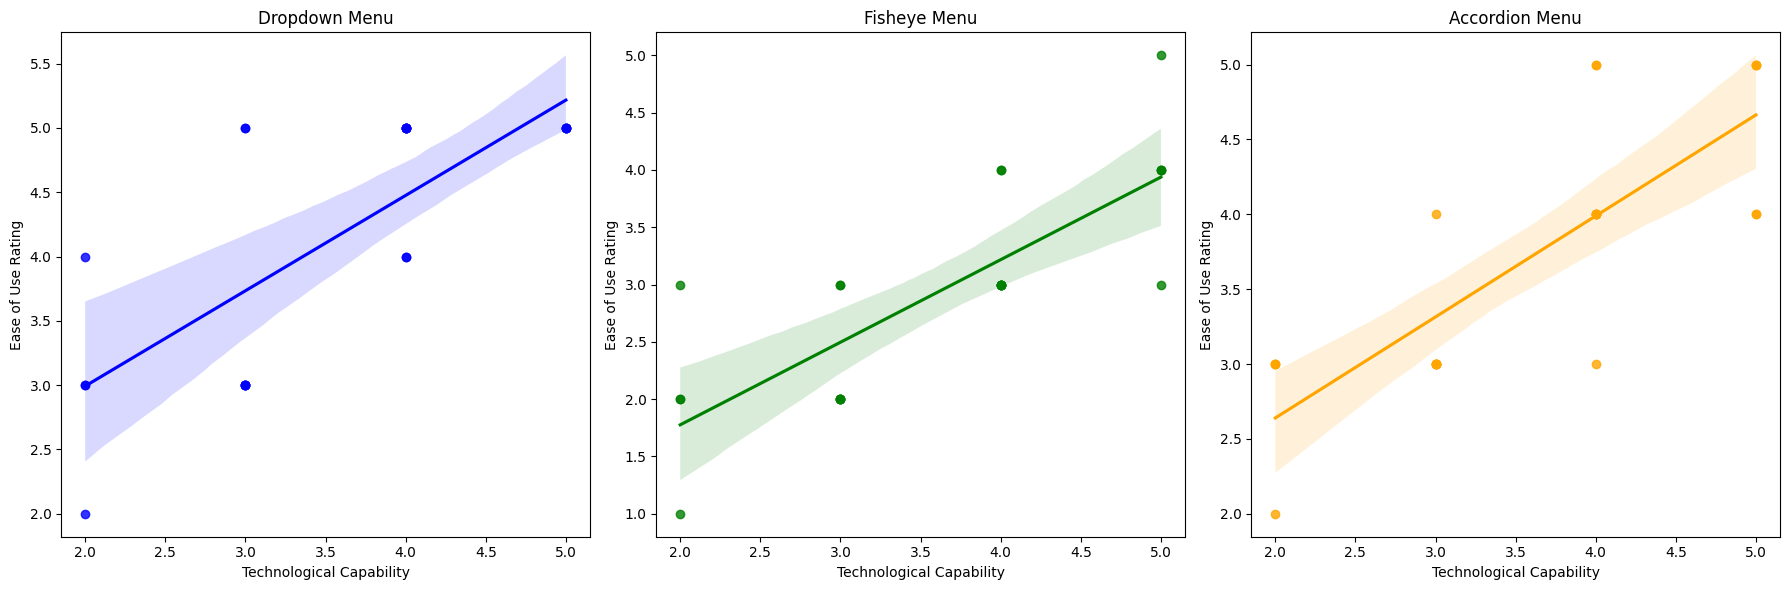

In [ ]:
# Extracting data
dropdown_easy_use = [entry[7] for entry in organized_data_list]
fisheye_easy_use = [entry[11] for entry in organized_data_list]
accordion_easy_use = [entry[15] for entry in organized_data_list]
tech_capability = [entry[4] for entry in organized_data_list]

# Creating a DataFrame for ease of use ratings and technological capability
data = {
    'Technological Capability': tech_capability,
    'Dropdown Ease of Use': dropdown_easy_use,
    'Fisheye Ease of Use': fisheye_easy_use,
    'Accordion Ease of Use': accordion_easy_use
}
df = pd.DataFrame(data)

# Plotting scatter plots with regression lines for each menu type
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.regplot(x='Technological Capability', y='Dropdown Ease of Use', data=df, color='blue')
plt.title('Dropdown Menu')
plt.xlabel('Technological Capability')
plt.ylabel('Ease of Use Rating')

plt.subplot(1, 3, 2)
sns.regplot(x='Technological Capability', y='Fisheye Ease of Use', data=df, color='green')
plt.title('Fisheye Menu')
plt.xlabel('Technological Capability')
plt.ylabel('Ease of Use Rating')

plt.subplot(1, 3, 3)
sns.regplot(x='Technological Capability', y='Accordion Ease of Use', data=df, color='orange')
plt.title('Accordion Menu')
plt.xlabel('Technological Capability')
plt.ylabel('Ease of Use Rating')

plt.tight_layout()
plt.show()


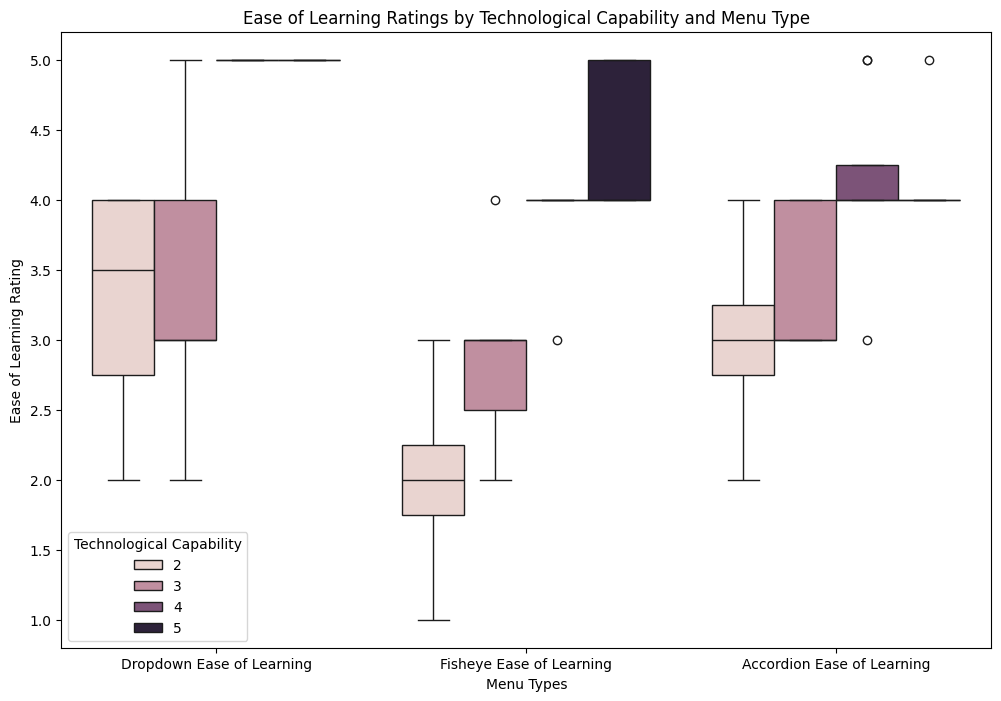

In [ ]:
# Extracting ease of learning ratings and technological capability data
dropdown_easy_learn = [entry[8] for entry in organized_data_list]
fisheye_easy_learn = [entry[12] for entry in organized_data_list]
accordion_easy_learn = [entry[16] for entry in organized_data_list]
tech_capability = [entry[4] for entry in organized_data_list]

# Creating a DataFrame for ease of learning ratings and technological capability
data = {
    'Technological Capability': tech_capability,
    'Dropdown Ease of Learning': dropdown_easy_learn,
    'Fisheye Ease of Learning': fisheye_easy_learn,
    'Accordion Ease of Learning': accordion_easy_learn
}
df = pd.DataFrame(data)

# Melting the DataFrame for easier plotting with boxplot
df_melted = df.melt(id_vars=['Technological Capability'],
                    value_vars=['Dropdown Ease of Learning', 'Fisheye Ease of Learning', 'Accordion Ease of Learning'],
                    var_name='Menu Type', value_name='Ease of Learning Rating')

# Plotting the box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='Menu Type', y='Ease of Learning Rating', hue='Technological Capability', data=df_melted)
plt.title('Ease of Learning Ratings by Technological Capability and Menu Type')
plt.xlabel('Menu Types')
plt.ylabel('Ease of Learning Rating')
plt.show()


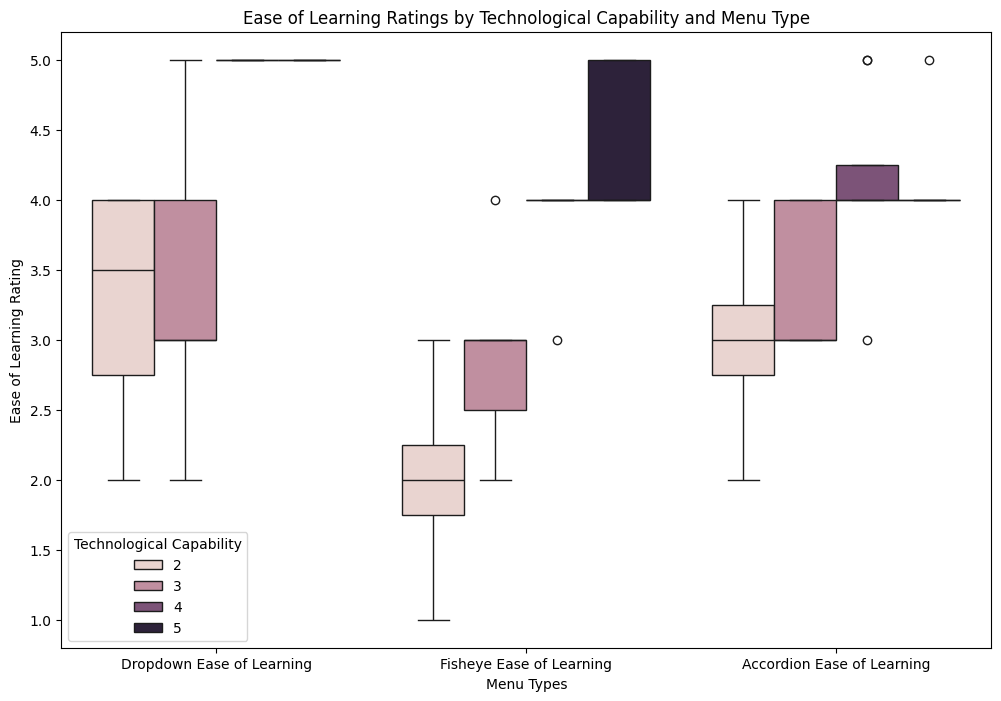

In [ ]:
# Extracting ease of learning ratings and technological capability data
dropdown_easy_learn = [entry[8] for entry in organized_data_list]
fisheye_easy_learn = [entry[12] for entry in organized_data_list]
accordion_easy_learn = [entry[16] for entry in organized_data_list]
tech_capability = [entry[4] for entry in organized_data_list]

# Creating a DataFrame for ease of learning ratings and technological capability
data = {
    'Technological Capability': tech_capability,
    'Dropdown Ease of Learning': dropdown_easy_learn,
    'Fisheye Ease of Learning': fisheye_easy_learn,
    'Accordion Ease of Learning': accordion_easy_learn
}
df = pd.DataFrame(data)

# Melting the DataFrame for easier plotting with boxplot
df_melted = df.melt(id_vars=['Technological Capability'],
                    value_vars=['Dropdown Ease of Learning', 'Fisheye Ease of Learning', 'Accordion Ease of Learning'],
                    var_name='Menu Type', value_name='Ease of Learning Rating')

# Plotting the box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='Menu Type', y='Ease of Learning Rating', hue='Technological Capability', data=df_melted)
plt.title('Ease of Learning Ratings by Technological Capability and Menu Type')
plt.xlabel('Menu Types')
plt.ylabel('Ease of Learning Rating')
plt.show()


In [ ]:
# Extracting data for ease of learning ratings
dropdown_easy_learn = [entry[8] for entry in organized_data_list]
fisheye_easy_learn = [entry[12] for entry in organized_data_list]
accordion_easy_learn = [entry[16] for entry in organized_data_list]


In [ ]:
# Creating a dataframe for ease of learning ratings
data = {
    'Dropdown': dropdown_easy_learn,
    'Fisheye': fisheye_easy_learn,
    'Accordion': accordion_easy_learn
}
df = pd.DataFrame(data)


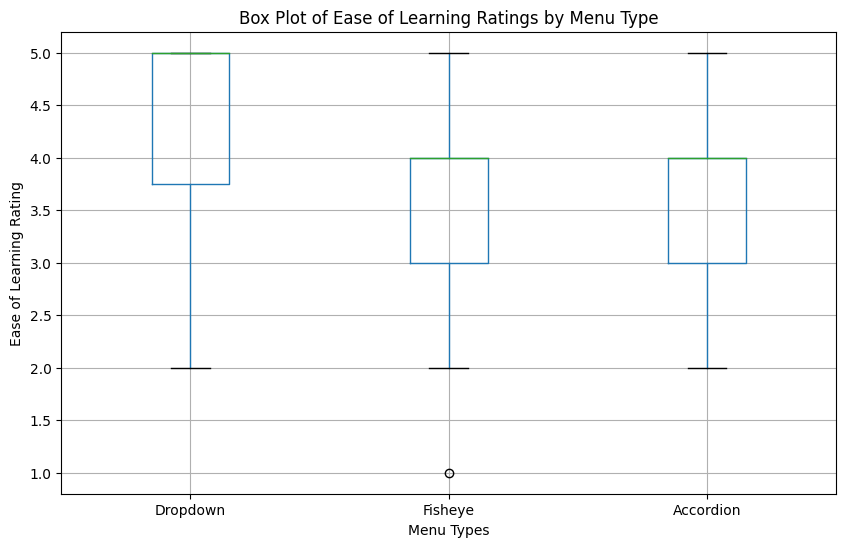

In [ ]:
# Plotting box plot
plt.figure(figsize=(10, 6))
df.boxplot()
plt.xlabel('Menu Types')
plt.ylabel('Ease of Learning Rating')
plt.title('Box Plot of Ease of Learning Ratings by Menu Type')
plt.show()


In [ ]:
# Extracting data for ease of learning ratings and technological capability
dropdown_easy_learn = [entry[8] for entry in organized_data_list]
fisheye_easy_learn = [entry[12] for entry in organized_data_list]
accordion_easy_learn = [entry[16] for entry in organized_data_list]
tech_capability = [entry[4] for entry in organized_data_list]


In [ ]:
# Calculating correlations
correlation_dropdown = np.corrcoef(tech_capability, dropdown_easy_learn)[0, 1]
correlation_fisheye = np.corrcoef(tech_capability, fisheye_easy_learn)[0, 1]
correlation_accordion = np.corrcoef(tech_capability, accordion_easy_learn)[0, 1]


In [ ]:
# Creating a DataFrame for the results
correlation_data = {
    'Menu Type': ['Accordion', 'Nested Fisheye', 'Nested Dropdown'],
    'Correlation with Technological Capability': [correlation_accordion, correlation_fisheye, correlation_dropdown]
}
correlation_df = pd.DataFrame(correlation_data).sort_values(by='Correlation with Technological Capability', ascending=False)

print("Correlation between Technological Capability and Ease of Learning Ratings:")
print(correlation_df)


Correlation between Technological Capability and Ease of Learning Ratings:
         Menu Type  Correlation with Technological Capability
1   Nested Fisheye                                   0.832317
2  Nested Dropdown                                   0.724207
0        Accordion                                   0.608334


In [ ]:
# Extracting task completion times and feedback
dropdown_times = [entry[5] for entry in organized_data_list]
fisheye_times = [entry[9] for entry in organized_data_list]
accordion_times = [entry[13] for entry in organized_data_list]

dropdown_feedback = [entry[7] for entry in organized_data_list]
fisheye_feedback = [entry[11] for entry in organized_data_list]
accordion_feedback = [entry[15] for entry in organized_data_list]


In [ ]:
# Creating a DataFrame
data = {
    'Dropdown Time': dropdown_times,
    'Fisheye Time': fisheye_times,
    'Accordion Time': accordion_times,
    'Dropdown Feedback': dropdown_feedback,
    'Fisheye Feedback': fisheye_feedback,
    'Accordion Feedback': accordion_feedback
}
df = pd.DataFrame(data)


In [ ]:
# Descriptive statistics
descriptive_stats = df.describe()
print(descriptive_stats)


       Dropdown Time  Fisheye Time  Accordion Time  Dropdown Feedback  \
count      24.000000     24.000000       24.000000          24.000000   
mean       32.341667     41.127500       37.731250           4.166667   
std        11.573918     11.381991       11.841781           1.007220   
min        15.080000     25.360000       22.220000           2.000000   
25%        21.850000     32.152500       27.492500           3.000000   
50%        29.645000     40.635000       36.815000           5.000000   
75%        39.177500     50.107500       48.552500           5.000000   
max        58.080000     64.310000       59.180000           5.000000   

       Fisheye Feedback  Accordion Feedback  
count         24.000000           24.000000  
mean           2.916667            3.708333  
std            0.928611            0.858673  
min            1.000000            2.000000  
25%            2.000000            3.000000  
50%            3.000000            4.000000  
75%            3.250

In [ ]:
# ANOVA test for task completion times
anova_times = f_oneway(dropdown_times, fisheye_times, accordion_times)
print('ANOVA for Task Completion Times:', anova_times)


ANOVA for Task Completion Times: F_onewayResult(statistic=3.5005203136675016, pvalue=0.03564671728677014)


In [ ]:
# ANOVA test for feedback
anova_feedback = f_oneway(dropdown_feedback, fisheye_feedback, accordion_feedback)
print('ANOVA for Feedback:', anova_feedback)


ANOVA for Feedback: F_onewayResult(statistic=11.013860013860008, pvalue=7.059959096424517e-05)


In [ ]:
# Post-hoc test for task completion times if ANOVA is significant
if anova_times.pvalue < 0.05:
    tukey_times = pairwise_tukeyhsd(endog=pd.concat([pd.Series(dropdown_times), pd.Series(fisheye_times), pd.Series(accordion_times)]),
                                    groups=pd.concat([pd.Series(['Dropdown']*len(dropdown_times)), pd.Series(['Fisheye']*len(fisheye_times)), pd.Series(['Accordion']*len(accordion_times))]),
                                    alpha=0.05)
    print(tukey_times)


   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1   group2  meandiff p-adj   lower    upper  reject
----------------------------------------------------------
Accordion Dropdown  -5.3896 0.2486 -13.4111   2.632  False
Accordion  Fisheye   3.3963 0.5705  -4.6253 11.4178  False
 Dropdown  Fisheye   8.7858 0.0285   0.7643 16.8074   True
----------------------------------------------------------


In [ ]:
# Post-hoc test for feedback if ANOVA is significant
if anova_feedback.pvalue < 0.05:
    tukey_feedback = pairwise_tukeyhsd(endog=pd.concat([pd.Series(dropdown_feedback), pd.Series(fisheye_feedback), pd.Series(accordion_feedback)]),
                                       groups=pd.concat([pd.Series(['Dropdown']*len(dropdown_feedback)), pd.Series(['Fisheye']*len(fisheye_feedback)), pd.Series(['Accordion']*len(accordion_feedback))]),
                                       alpha=0.05)
    print(tukey_feedback)


   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
  group1   group2  meandiff p-adj   lower   upper  reject
---------------------------------------------------------
Accordion Dropdown   0.4583 0.2122 -0.1871  1.1038  False
Accordion  Fisheye  -0.7917 0.0123 -1.4371 -0.1462   True
 Dropdown  Fisheye    -1.25    0.0 -1.8955 -0.6045   True
---------------------------------------------------------


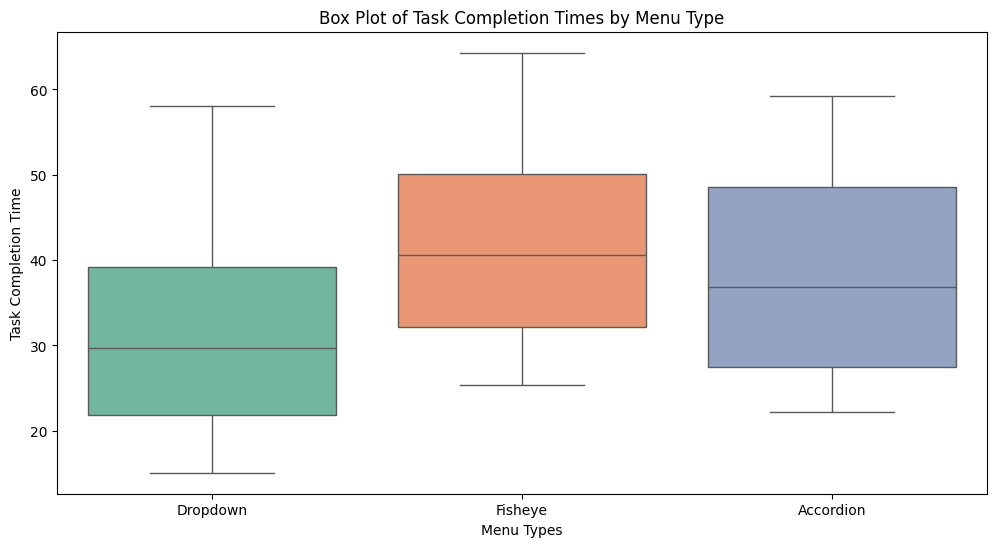

In [ ]:
# Box Plot for Task Completion Times
plt.figure(figsize=(12, 6))
sns.boxplot(data=[dropdown_times, fisheye_times, accordion_times], palette='Set2')
plt.xticks([0, 1, 2], ['Dropdown', 'Fisheye', 'Accordion'])
plt.xlabel('Menu Types')
plt.ylabel('Task Completion Time')
plt.title('Box Plot of Task Completion Times by Menu Type')
plt.show()


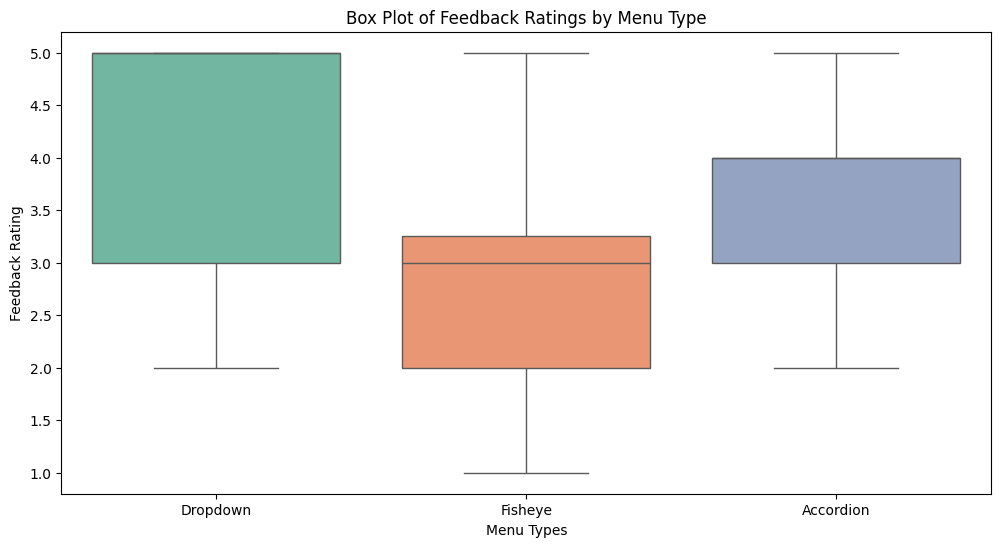

In [ ]:
# Box Plot for Feedback
plt.figure(figsize=(12, 6))
sns.boxplot(data=[dropdown_feedback, fisheye_feedback, accordion_feedback], palette='Set2')
plt.xticks([0, 1, 2], ['Dropdown', 'Fisheye', 'Accordion'])
plt.xlabel('Menu Types')
plt.ylabel('Feedback Rating')
plt.title('Box Plot of Feedback Ratings by Menu Type')
plt.show()
